In [1]:
import numpy as np
from sklearn.datasets import load_sample_images
from skimage import io
import cv2

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (17, 6)

%matplotlib inline

## seaborn
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# HTML
from IPython.core.display import HTML
HTML("""<style>.output_png {    display: table-cell;    text-align: center;    vertical-align: middle;}</style>""")

Getting Started with Open CV
=======================

We use the sklearn [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) to demonstrate basic operations using Open CV.

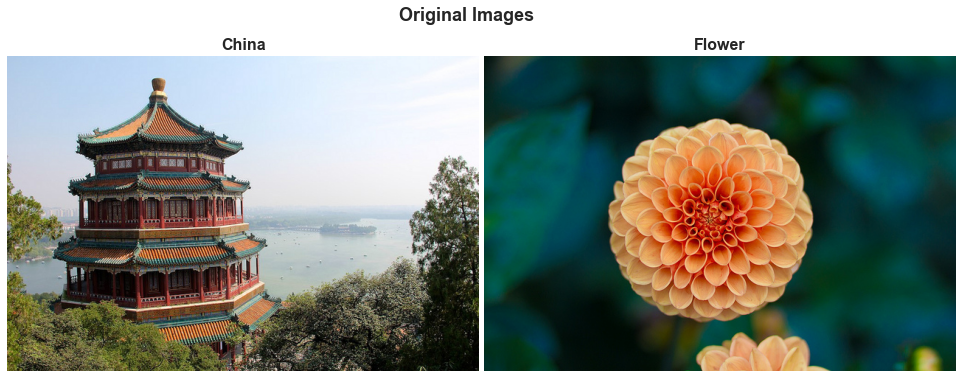

In [2]:
Images = load_sample_images()
Names = [x.split("\\")[-1].replace('.jpg','').title() for x in Images['filenames']]
Images = Images['images']

def ImShow(Images, Names, Title = 'Images', axis_tight = False):
    fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
    ax = ax.ravel()
    font = FontProperties()
    font.set_weight('bold')
    for i in range(2):
        _ = ax[i].imshow(Images[i])
        if axis_tight:
            _ = ax[i].axis('tight')
        _ = ax[i].axis('off')
        _ = ax[i].set_title(Names[i], fontproperties=font, fontsize = 16)
    _ = fig.subplots_adjust(wspace= 0.01)
    if Title:
        _ = fig.suptitle(Title, fontproperties=font, fontsize = 18)
    return fig, ax
# Image Show
_,_ = ImShow(Images, Names, Title = 'Original Images')

## Accessing and Modifying pixel values

We can use **split** funtion to access various [channels](https://en.wikipedia.org/wiki/Channel_(digital_image) of an image.

In [3]:
B, G, R = cv2.split(Images[0])

Alternatively, we could use, for example, use ```Img[:,:,0]```, ```Img[:,:,1]``` and ```Img[:,:,2]``` to access the red, green and blue chanells of ```Img```.

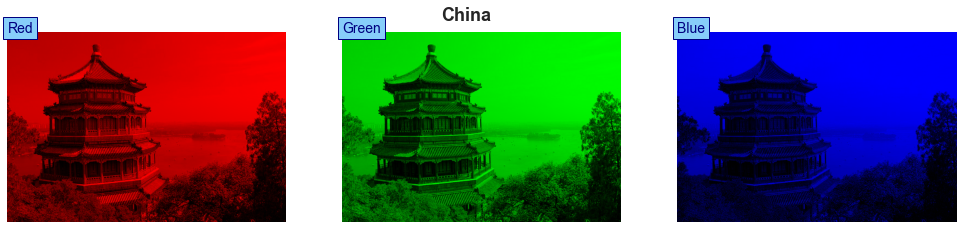

In [4]:
fig, ax = plt.subplots(1, 3 , figsize = (17, 3.5))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle(Names[0], fontproperties=font, fontsize = 18)

Channels = ['Red', 'Green', 'Blue']

for i in range(3):
    img = 0*Images[0]
    img[:,:,i] = Images[0][:,:,i]
    _ = ax[i].imshow(img)
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
    _ = ax[i].text(x = 0, y = 0, s = Channels[i], size=14,
                   color = 'Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

## Adding Pading

* ```cv2.BORDER_CONSTANT```: Adds a solid colored border.
* ```cv2.BORDER_REFLECT```: Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
* ```cv2.BORDER_REFLECT_101``` or ```cv2.BORDER_DEFAULT```: Border will be mirror reflection of the border elements, like this : like this : * gfedcb|abcdefgh|gfedcba
* ```cv2.BORDER_REPLICATE``` - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
* ```cv2.BORDER_WRAP``` - It will look like this : cdefgh|abcdefgh|abcdefg

For more information, please see the offical documentation [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#accessing-image-properties).

In [5]:
Dict = {cv2.BORDER_CONSTANT:'BORDER_CONSTANT',
        cv2.BORDER_REPLICATE:'BORDER_REPLICATE',
        cv2.BORDER_REFLECT:'BORDER_REFLECT',
        cv2.BORDER_WRAP:'BORDER_WRAP',
        cv2.BORDER_REFLECT_101:'BORDER_REFLECT_101'}

# RGB Colors
RGB = [[0,0,0] for i in range(3)]
for i in range(3):
    RGB[i][i] += 255

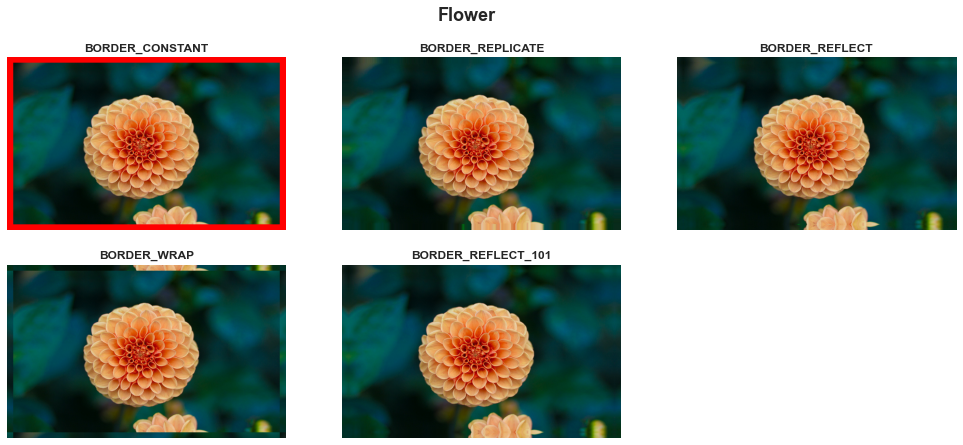

In [6]:
fig, ax = plt.subplots(2, 3 , figsize = (17, 7))
ax = ax.ravel()
fig.delaxes(ax[-1]) 
_ = fig.suptitle(Names[1], fontproperties=font, fontsize = 18)

for i in range(len(Dict)):
    img = cv2.copyMakeBorder(Images[1], 15, 15, 15, 15, i, value= RGB[0])
    _ = ax[i].imshow(img)
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
    _ = ax[i].set_title( Dict[i], fontproperties=font, fontsize = 12)

## Image Blending

Image blending can be done using ```cv2.addWeighted```. This function blends two images as follows

$$\text{Output Image} = \alpha\,\text{Image1} + (1-\alpha)\, \text{Image2} + \gamma$$

where $0\leq \alpha\leq 1$ and $\gamma$ is a an integer.

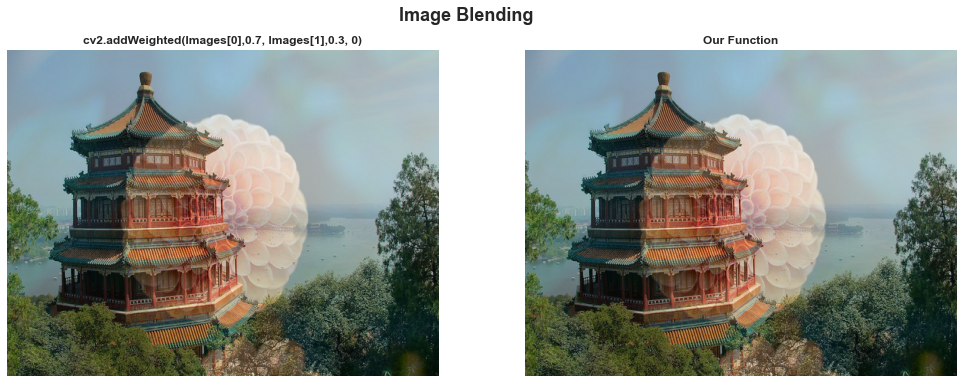

In [7]:
Augmented_Images = Images.copy()
# First Method
Augmented_Images[0] = cv2.addWeighted(Images[0],0.7, Images[1],0.3, 0)
# Second Method
Augmented_Images[1] = np.round(((0.7)*Images[0] + (0.3)*Images[1])).astype('uint8') 

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Image Blending', fontproperties=font, fontsize = 18)

Title = ['cv2.addWeighted(Images[0],0.7, Images[1],0.3, 0)', 'Our Function']
for i in range(2):
    _ = ax[i].imshow(Augmented_Images[i])
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
    _ = ax[i].set_title(Title[i], fontproperties=font, fontsize = 12)

## Bitwise Operations

This includes bitwise AND, OR, NOT and XOR operations.

* [bitwise_and](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-and): Calculates the per-element bit-wise conjunction of two arrays or an array and a scalar.
* [bitwise_not](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-not): Calculates the per-element Inverts every bit of an array.
* [bitwise_or](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-or): Calculates the per-element bit-wise disjunction of two arrays or an array and a scalar.
* [bitwise_xor](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-xor): Calculates the per-element bit-wise “exclusive or” operation on two arrays or an array and a scalar.

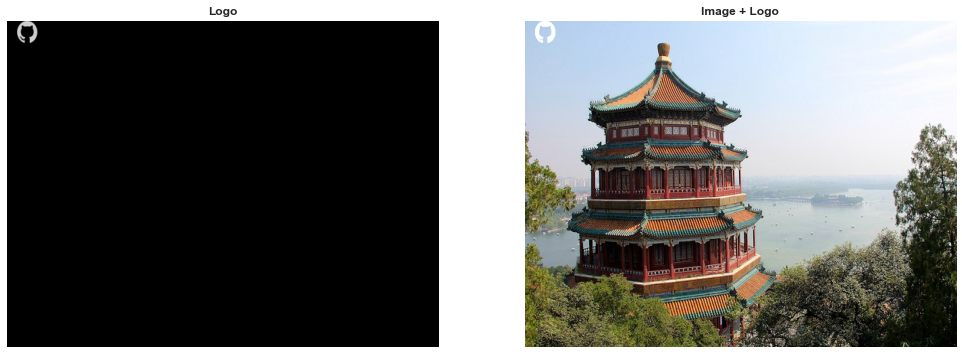

In [8]:
Git = io.imread('https://github.githubassets.com/images/modules/open_graph/github-mark.png')
scale = 0.05 # of original size
Git_resized = cv2.resize(Git, tuple(np.dot(scale,Git.shape[:2][::-1]).astype(int)), interpolation = cv2.INTER_AREA)

## Invert
# Git_resized =  255 - Git_resized
Git_resized = cv2.bitwise_not(Git_resized)

Img = Images[0]
Mask = 0*Img
Mask[0: Git_resized.shape[0], 0:Git_resized.shape[1],:] = Git_resized
Img = cv2.add(Img,Mask)
fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
_ = ax[0].imshow(Mask)
_ = ax[1].imshow(Img)

for i in range(len(ax)):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')

_ = ax[0].set_title('Logo', fontproperties=font, fontsize = 12)
_ = ax[1].set_title('Image + Logo', fontproperties=font, fontsize = 12)

# Changing Colorspaces

This is done via [cvtColor](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor) which converts an image from one color space to another.

### RGB to Grayscale

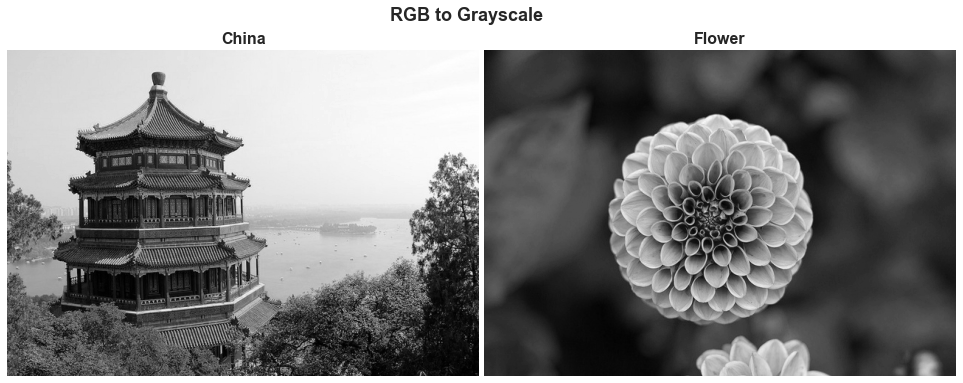

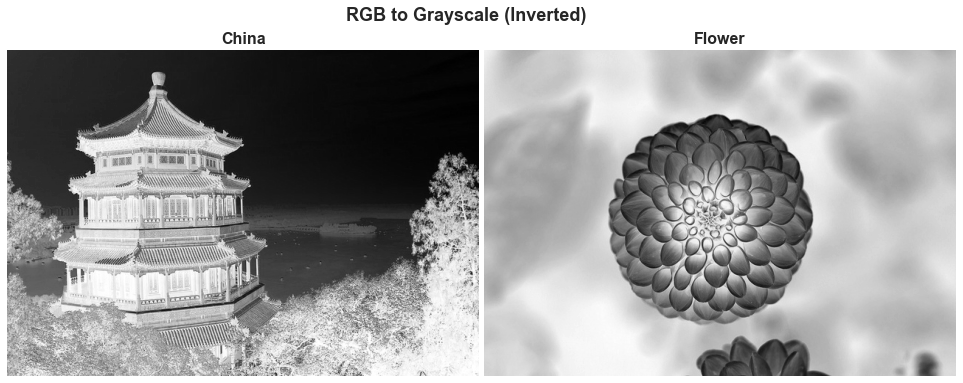

In [9]:
Augmented_Images = Images.copy()
for i in range(len(Augmented_Images)):
    Augmented_Images[i] = cv2.cvtColor(Augmented_Images[i],cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
for i in range(2):
    _ = ax[i].imshow(Augmented_Images[i],'gray')
    _ = ax[i].axis('tight')
    _ = ax[i].axis('off')
    _ = ax[i].set_title(Names[i], fontproperties=font, fontsize = 16)
_ = fig.subplots_adjust(wspace= 0.01)
_ = fig.suptitle('RGB to Grayscale', fontproperties=font, fontsize = 18)
        

Augmented_Images = Images.copy()
for i in range(len(Augmented_Images)):
    Augmented_Images[i] = cv2.bitwise_not(cv2.cvtColor(Augmented_Images[i],cv2.COLOR_BGR2GRAY))

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
for i in range(2):
    _ = ax[i].imshow(Augmented_Images[i],'gray')
    _ = ax[i].axis('tight')
    _ = ax[i].axis('off')
    _ = ax[i].set_title(Names[i], fontproperties=font, fontsize = 16)
_ = fig.subplots_adjust(wspace= 0.01)
_ = fig.suptitle('RGB to Grayscale (Inverted)', fontproperties=font, fontsize = 18)

### RGB to HSV

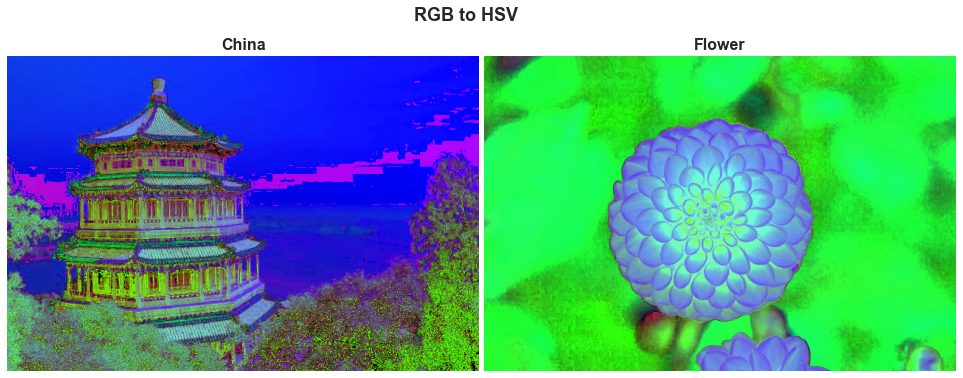

In [10]:
Augmented_Images = Images.copy()
for i in range(len(Augmented_Images)):
    Augmented_Images[i] = cv2.cvtColor(Augmented_Images[i],cv2.COLOR_BGR2HSV)
_,_ = ImShow(Augmented_Images, Names, Title = 'RGB to HSV')

***

## Refrences
1. [OpenCV documentation](https://docs.opencv.org/2.4/index.html)
2. [OpenCV-Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html#opencv-python-tutorials)
***